In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r"times.txt", names=["Number of processes", "N", "Time (s)"])
df.astype({"Number of processes": 'int8', "N" : "int64", "Time (s)" : "double"})
df.head()

,Number of processes,N,Time (s)
0,0,1000000,0.004691
1,0,10000000,0.065410
2,0,100000000,0.965118
3,0,1000000000,12.606569
4,0,10000000000,148.148676


# Performance analysis Sieve of Erathosthenes
Ran on a 4-core processor 8 GB RAM Ubunutu Virtual Machine
## Sequential:
Entries marked with Number of threads == 0 are run on the sequential version.

In [3]:
seq = df[df["Number of processes"] == 0].sort_values("N", axis=0)
seq

,Number of processes,N,Time (s)
0,0,1000000,0.004691
1,0,10000000,0.065410
2,0,100000000,0.965118
3,0,1000000000,12.606569
4,0,10000000000,148.148676


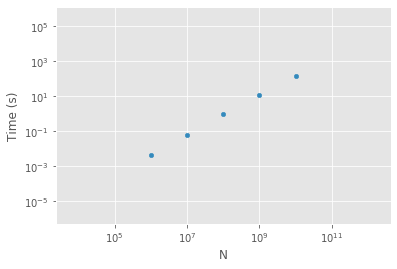

In [4]:
seq.plot(x="N", y="Time (s)", kind="scatter", loglog=True)
plt.show()

Time needed to find all prime numbers under `N` increases roughly linearly. It is quite fast.
## MPI:

In [5]:
groups = df.groupby(["Number of processes", "N"]).mean()
df[df["Number of processes"] != 0].groupby(["N", "Number of processes"]).mean()

Time (s)
N           Number of processes            
1000000     1                      0.004832
            2                      0.008422
            3                      0.006578
            4                      0.005575
10000000    1                      0.079674
            2                      0.115843
            3                      0.117621
            4                      0.114187
100000000   1                      1.009080
            2                      3.093652
            3                      2.943544
            4                      3.018331
1000000000  1                     11.240482
            2                     37.256294
            3                     35.981735
            4                     36.929558
10000000000 1                    150.722700
            2                    534.977278
            3                    483.856276
            4                    484.745668

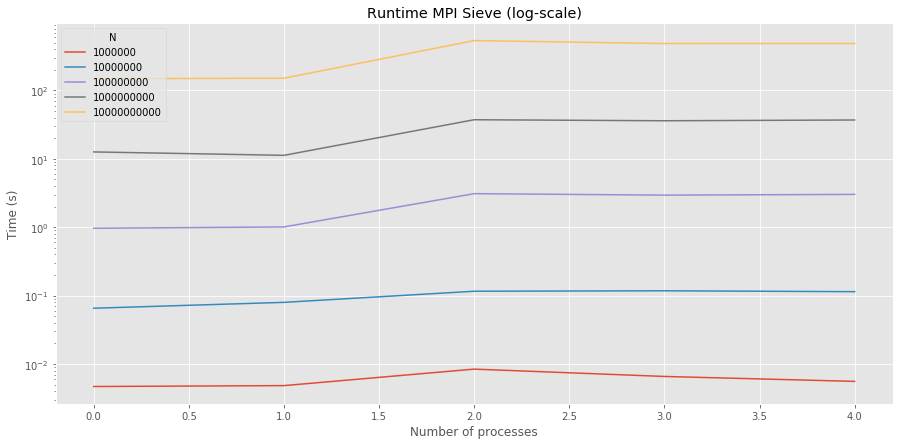

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
groups.unstack().plot(logy=True, y="Time (s)", ax=ax)
ax.set_ylabel("Time (s)")
ax.set_title("Runtime MPI Sieve (log-scale)")
plt.show()

As you can see, no speed up is reached. Going going from one to two processes makes this implementation of the Sieve 2.5 to 3 times slower. Adding any more processes slows down nor speeds up the Sieve. There is almost no speed difference between a single process version of the MPI Sieve and the Sequential version (sequential being marked as Number of processes = 0).

## Conclusion
I was unable to make my parallel version of the Sieve any faster than the sequential version of my sieve. 

In my original version of the MPI Sieve, I used MPI methods where possible (See design). These MPI methods cause a lot of overhead and inadvertently made the script less parallel. I stripped away the majority of these features, letting each process handle much more of their own business. 

Stripping away most MPI methods, I was left with only the `MPI.reduce` method to sum up each process' individual number of prime numbers. My original version got linearly slower when adding new processes. Leaving only `MPI.reduce` as the only MPI method ensured that the script did not get any slower when adding more than one extra process. 

### Reflection
While I feel that I understand parallelism in a conceptual sense, I do recognize that my abilities to implement parallelism are lacking. Looking back, I was only able to speed up the original algorithms in two of the assignments. In only one of these assignments I managed to speed up the algorithm consistently. 

In regular, sequential, programming I am able to program mainly on instinct. I have enough experience that it feels “natural” to write fast code and enough knowledge on the subject to defend my decisions.  I still need to develop this instinct for parallel programming.

For this assignment, I removed as much of the overhead causing slow down as I could imagine. I managed to speed it up to the point that adding more processes would not increase runtime further. 

The only way I can imagine speeding up the MPI Sieve, is by more effectively using a master-worker pattern. If we ensure that `range(2, root_N+1)` is in process 0, we can have process 0 check and broadcast if k equals a prime number. This would eliminate the need to have a for-loop in each separate process. It would also eliminate a lot of the checks done in the functions `first_common_index` and `update_partial_sieve`. 

I believe I deserve a passing grade for this assignment. Though I was unable to speed up the MPI Sieve, through my conceptual designs, coding, and conversations had with teachers I did show an understanding of OpenMP, MPI, and the concepts of parallelism. I was even able to explain parallelism and how difficult it can be to implement to my parents! 
